<a href="https://colab.research.google.com/github/EltonCampos07/cursosolidity/blob/master/script_tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [110]:
df = pd.read_csv('/content/pesquisa/dados.csv')

df.replace({
    'Sim': 1,
    'Não': 0,

    'Particular': 1,
    'Pública': 0,

    'Concordo totalmente': 1,
    'Concordo parcialmente': 2,
    'Neutro': 3,
    'Discordo parcialmente': 4,
    'Discordo totalmente': 5,

    'Abaixo de 2.000 por mês': 1,
    'Entre 2.000 a 5.000 por mês': 2,
    'Entre 5.000 a 10.000': 3,
    'Acima de 10.000': 4,

    'Doença': 1,
    'Desentendimentos': 2,
    'Falta de contato': 3,
    'Trabalhando com a familia': 4,
    'Outros': 5

    }, inplace=True)


print(df)

     Você estuda ou já estudou em instituição publica ou particular?  \
0                                                    1                 
1                                                    1                 
2                                                    1                 
3                                                    1                 
4                                                    0                 
..                                                 ...                 
358                                                  1                 
359                                                  1                 
360                                                  1                 
361                                                  1                 
362                                                  1                 

     A instituição de ensino se localiza em Curitiba ou região?  \
0                                                    1            
1

In [111]:
# Selecionar as colunas que serão usadas para clustering
features = df.columns

# Normalizar os dados
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df[features])

print(data_normalized)


[[ 0.34194017  0.19272482 -0.30557077 ... -0.1748312  -0.8699661
  -0.87122803]
 [ 0.34194017  0.19272482 -0.30557077 ...  1.14732973 -0.8699661
   1.47720594]
 [ 0.34194017  0.19272482 -0.30557077 ... -0.83591166 -0.8699661
   0.69439461]
 ...
 [ 0.34194017 -5.18874522 -0.30557077 ... -1.49699213 -0.8699661
  -0.87122803]
 [ 0.34194017  0.19272482  3.27256435 ... -0.1748312   0.89920866
  -0.08841671]
 [ 0.34194017  0.19272482 -0.30557077 ...  0.48624927  0.89920866
   0.69439461]]


In [149]:
def calculate_wcss(data):
    wcss = []
    for n in range(1, 10):
        kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    # Plotar o gráfico
    plt.plot(range(1, 10), wcss, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Within-Cluster Soma dos Quadrados (WCSS)')
    plt.title('Método do Cotovelo')
    plt.show()

    return wcss

#Calculando a quantidade ideal de cluster

def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 9, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+1
        y0 = wcss[i]
        numerator = abs((y2-y1) * x0 - (x2-x1) * y0 + x2*y1 - y2 * x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 1


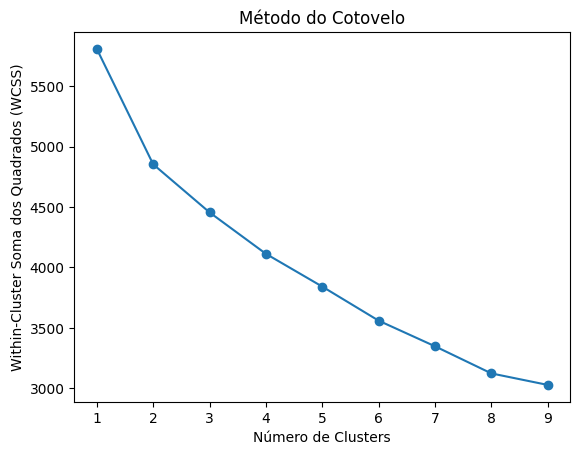

A quantidade ideal de clusters é: 3


In [150]:
sum_of_squares = calculate_wcss(data_normalized)
n = optimal_number_of_clusters(sum_of_squares)

print(f"A quantidade ideal de clusters é: {n}")

In [151]:
# Ajustar o modelo KMeans com o número ideal de clusters
kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
kmeans.fit(data_normalized)

# Adicionar os rótulos dos clusters ao dataframe original
df['Cluster'] = kmeans.labels_

# Imprimir o resultado
print(df)

     Você estuda ou já estudou em instituição publica ou particular?  \
0                                                    1                 
1                                                    1                 
2                                                    1                 
3                                                    1                 
4                                                    0                 
..                                                 ...                 
358                                                  1                 
359                                                  1                 
360                                                  1                 
361                                                  1                 
362                                                  1                 

     A instituição de ensino se localiza em Curitiba ou região?  \
0                                                    1            
1

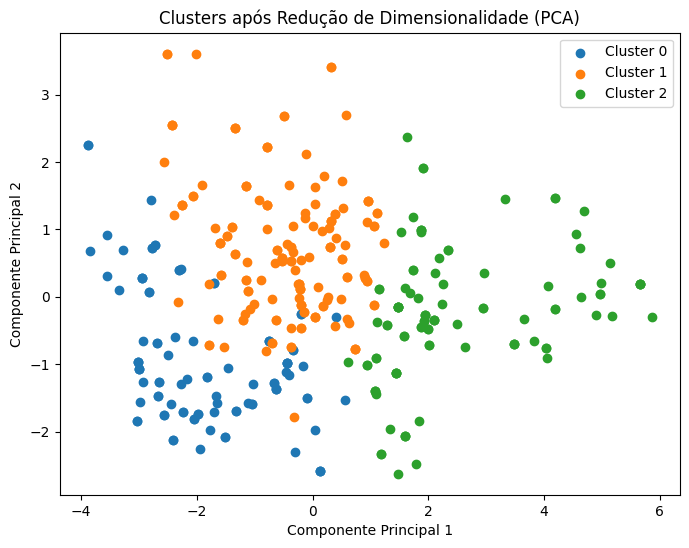

In [152]:
# Reduzir a dimensionalidade para visualização
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Plotar os clusters
plt.figure(figsize=(8, 6))
for cluster in set(kmeans.labels_):
    plt.scatter(data_pca[df['Cluster'] == cluster, 0], data_pca[df['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.title('Clusters após Redução de Dimensionalidade (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()